In [1]:
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image, ImageFilter

from cascid.configs import pad_ufes
from cascid import image_preprocessing, image_sampling


In [2]:
df = pd.read_csv(pad_ufes.METADATA)
hair_ids = [
    "PAT_691", "PAT_320", "PAT_109", "PAT_356", "PAT_681", "PAT_167",
    "PAT_2109", "PAT_245", "PAT_633"
]
df_hair_test = df[df["patient_id"].isin(hair_ids)]

## Image preprocessing without denoising

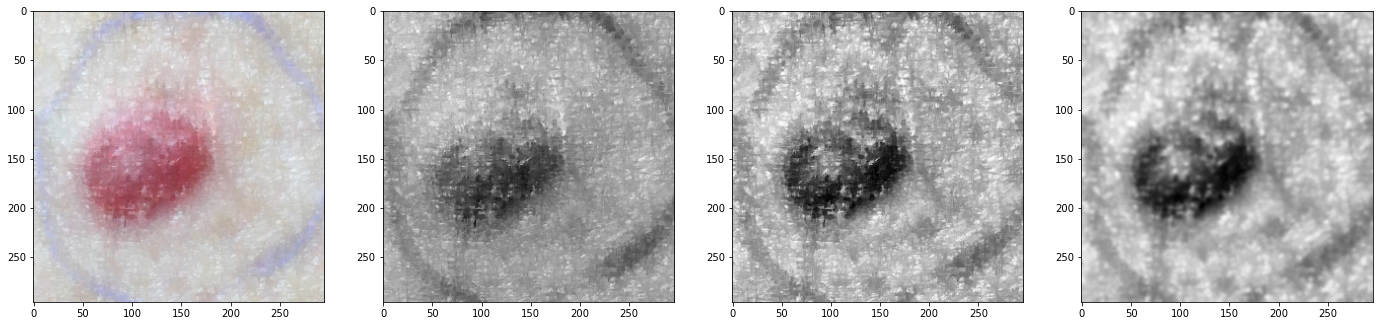

In [3]:
img_list = []
filename = df_hair_test['img_id'].iloc[10]
filename = str(pad_ufes.IMAGES_DIR / filename)
img = cv2.imread(filename)[:,:,::-1]

dst  = image_preprocessing.remove_hairs(img)
processed_img  = image_preprocessing.preprocessing_article(dst)
clahe  = image_preprocessing.simple_processing_clahe(dst)
lab = image_preprocessing.preprocessing_lab_histeq_grey(dst)
img_list.append(dst)
img_list.append(processed_img)
img_list.append(clahe)
img_list.append(lab)

image_sampling.image_grid(img_list,1)

## Denoising - gray

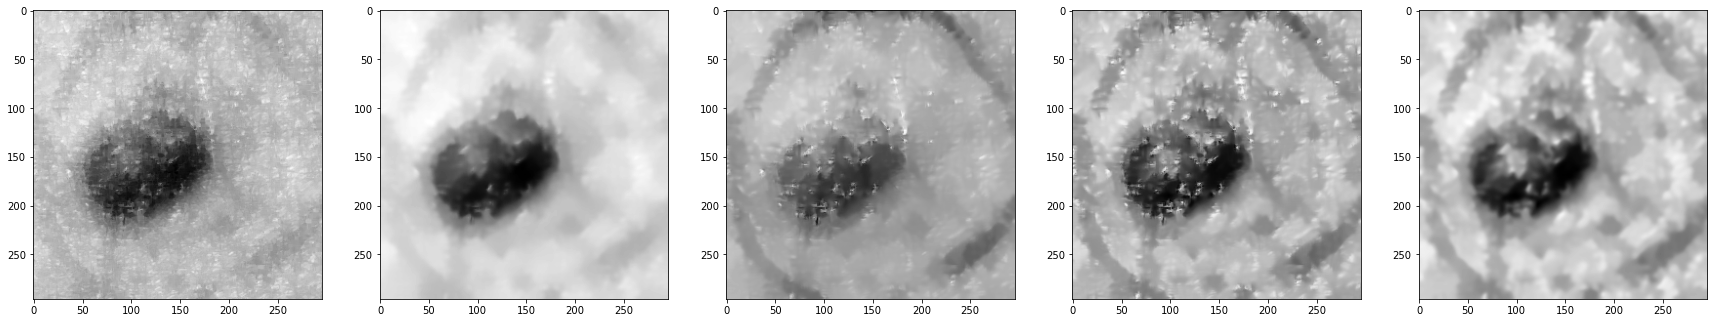

In [5]:
img_list = []

gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY )

noiseless_gray = cv2.fastNlMeansDenoising(gray, None, 11, 7, 21) 
noiseless_processed = cv2.fastNlMeansDenoising(processed_img, None, 11, 7, 21) 
noiseless_clahe = cv2.fastNlMeansDenoising(clahe, None, 11, 7, 21) 
noiseless_lab = cv2.fastNlMeansDenoising(lab, None, 11, 7, 21) 

img_list.append(gray)
img_list.append(noiseless_gray)
img_list.append(noiseless_processed)
img_list.append(noiseless_clahe)
img_list.append(noiseless_lab)

image_sampling.image_grid(img_list,1)

# Denoising - colored

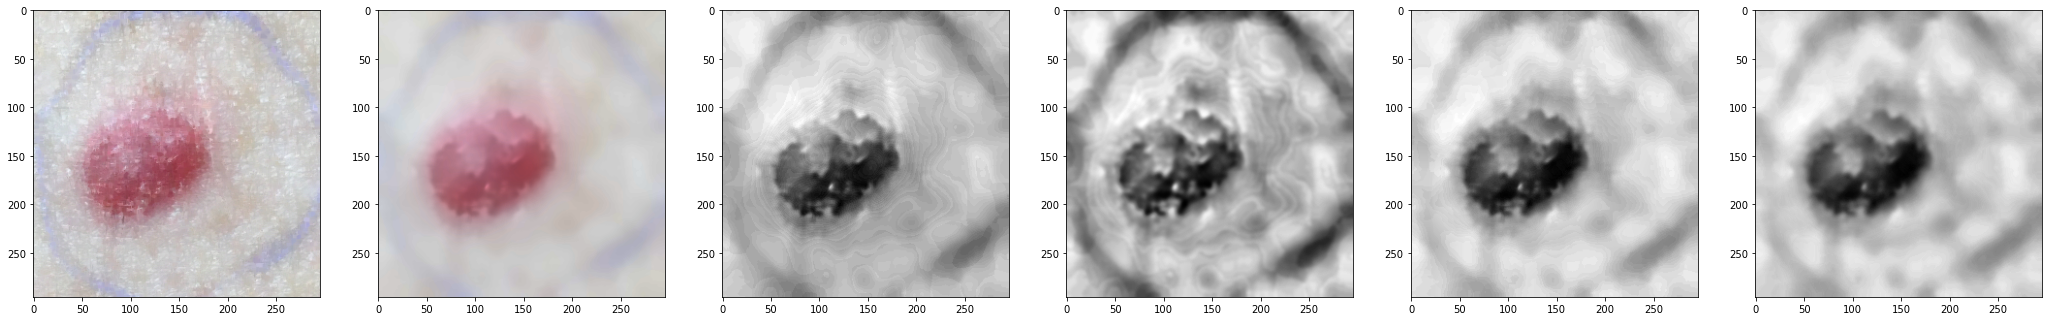

In [6]:
img_list = []

noiseless_colored = cv2.fastNlMeansDenoisingColored(dst,None,10,10,7,21) 
processed_img  = image_preprocessing.preprocessing_article(noiseless_colored)
processed_img_histeq  = image_preprocessing.preprocessing_article_histeq(noiseless_colored)
processed_clahe  = image_preprocessing.simple_processing_clahe(noiseless_colored)
processed_lab  = image_preprocessing.preprocessing_lab_histeq_grey(noiseless_colored)

img_list.append(dst)
img_list.append(noiseless_colored)
img_list.append(processed_img)
img_list.append(processed_img_histeq)
img_list.append(processed_clahe)
img_list.append(processed_lab)

image_sampling.image_grid(img_list,1)

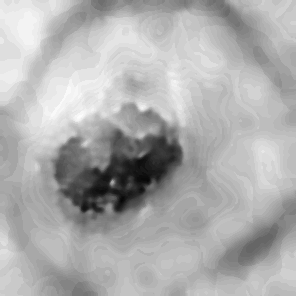

In [7]:
# Median filter (python)
PIL_image = Image.fromarray(processed_img.astype('uint8'), 'L')

native_output = PIL_image.filter(ImageFilter.MedianFilter(size = 3))
native_output